<h1>Estimación de las emiciones de CO2 con una regrtesión lineal.</h1>
<h3>Autor: <b>Jesús Méndez</b></h3>
<h3>Infomración de contacto</h3>
<ul>
    <li>Tel: <b>+52 55-8290-5977</b></li>
    <li>IG: <b>jesusdev.js</b></li>
    <li>Website: <b>https://jesusdev.netlify.app</b></li>
    <li>Github: <b>github.com/jesus105</b></li>
    <li>Fecha: <b>13/07/2020</b></li>
</ul>

<h2>Importamos las librerías</h2>

In [63]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

<h2>Importamos el dataset</h2>


In [64]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2020-07-14 01:32:43--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Cargado certificado CA '/etc/ssl/certs/ca-certificates.crt'
Resolviendo s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)...67.228.254.196
Conectando con s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)[67.228.254.196]:443...conectado.
Petición HTTP enviada, esperando respuesta...200 OK
Longitud: 72629 (71K) [text/csv]
Grabando a: “FuelConsumption.csv”

FuelConsumption.csv 100%[===================>]  70.93K   422KB/s    en 0.2s    

2020-07-14 01:32:43 (422 KB/s) - “FuelConsumption.csv” guardado [72629/72629]



<h3>Leyendo los datos</h3>

In [65]:
dataset = pd.read_csv("FuelConsumption.csv")

#Mirando la "cabeza" del dataset
dataset.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


<h3>Explicación de los datos</h3>
<p>Primero vamos a tener una exploración descriptiva dentro de nuestros datos</p>

In [66]:
#Descripción de los datos
dataset.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


<p>Sleccionamos algunas caracteristicas mas para explorar</p>

In [67]:
caracteristicas = dataset[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
caracteristicas.head(10)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267
9,2.4,4,9.2,212


<p>Podemos gráficar cada una de las caracteristicas</p>

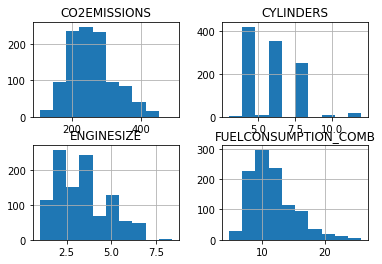

In [68]:
vistas = caracteristicas[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
vistas.hist()
plt.show()

<p>Ahora graficaremos cada una de las caracteristicas respecto a la emisión de CO2 para ver que tan lineal es su relación</p>

<h3>Emisiones de CO2 respecto a consumo de combustible.</h3>

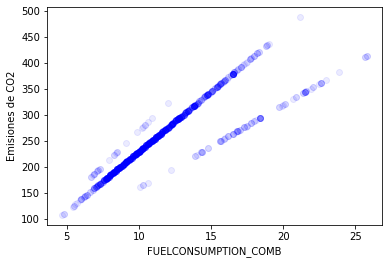

In [69]:
plt.scatter(caracteristicas.FUELCONSUMPTION_COMB, caracteristicas.CO2EMISSIONS,  color='blue', alpha=0.08)
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emisiones de CO2")
plt.show()

<h3>Emisiones de CO2 respecto al tamaño de la maquina.</h3>


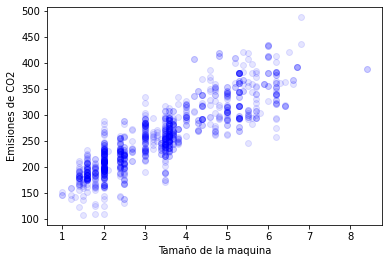

In [70]:
plt.scatter(caracteristicas.ENGINESIZE, caracteristicas.CO2EMISSIONS,  color='blue', alpha=0.1)
plt.xlabel("Tamaño de la maquina")
plt.ylabel("Emisiones de CO2")
plt.show()

<h3>Emisiones de CO2 respecto al número de cilindros.</h3>

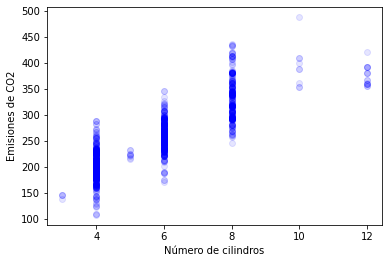

In [71]:
plt.scatter(caracteristicas.CYLINDERS, caracteristicas.CO2EMISSIONS,  color='blue', alpha=0.1)
plt.xlabel("Número de cilindros")
plt.ylabel("Emisiones de CO2")
plt.show()

<h2>Procesamiento de los datos</h2>

<h3>Separación de los datos para entrenamiento y prueba</h3>
<p>Separamos los datos de "train" en entrenamiento y prueba en "test" para probar los algoritmos</p>
<p>Con ayuda de la librería NumPy nosotros de manera aleatoria tomamos un 80% De los datos para entrener a nuestro modelo y el otro 20% lo ocuparemos para ponerlo a prueba</p>

In [72]:
#Seleccionamos el 80% de datos de forma aleatoria así
random = np.random.rand(len(dataset)) < 0.8
#Los datos seleccionados se quedan en la siguiente variable
train = caracteristicas[random]
#El 20% restante se queda en la variable de prueba
test = caracteristicas[~random]

<p>Seguidamente definimos el algoritmo a utilizar que es el de LinearRegression.</p>

In [73]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

<p>Ahora debemos de definir las variables donde estarán almacenados nuestros datos de entrada y salida.</p>

In [74]:
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

<p>Como siguiente paso debemos de entrenar a nuestro modelo y mostrar sus resultados.</p>

In [75]:
regr.fit (train_x, train_y)
# Aquí estan los valores de W0 y W1
print ('W1: ', regr.coef_[0][0])
print ('W0: ',regr.intercept_[0])

W1:  39.364231572799554
W0:  124.64191479143221


<p>Una vez entrenado nuestro modelo debemos mostrar como se verán nuestras predicciones</p>

Text(0, 0.5, 'Emisiones de CO2')

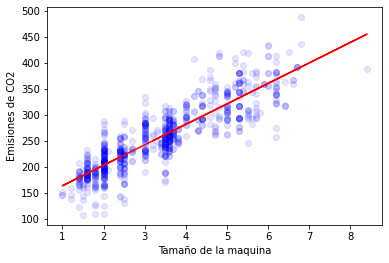

In [78]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue', alpha=0.1)
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Tamaño de la maquina")
plt.ylabel("Emisiones de CO2")

In [ ]:
<p>Por ultimo debemos de medir la efectividad de nuestro modelo
</p>

In [86]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_hat = regr.predict(test_x)

print("MAE: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("MSE: %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("puntuación R2: %.2f" % r2_score(test_y_hat , test_y) )

SyntaxError: invalid syntax (<ipython-input-86-4e02b0c67821>, line 8)

<p>A partir de esto podemos decir que nuestro modelo tuvo un 71% de efectividad y ahora nos encargaremos de hacer nuestras propias predicciones.</p>

In [87]:
def emision(tamaño):
    Y = regr.coef_[0][0]*tamaño + regr.intercept_[0]
    return Y

print("Las emisiones de C02 con una máquina de tamaño 3 serán de: %.3f" % emision(3)) 


Las emisiones de C02 con una máquina de tamaño 3 serán de: 242.735
